In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [2]:
train = tf.keras.utils.image_dataset_from_directory(r"C:\Users\KIIT01\PlantVillage\train",
                                                      batch_size = 200,
                                                      image_size = (50,50),
                                                      seed=123)

Found 43444 files belonging to 38 classes.


In [3]:
val = tf.keras.utils.image_dataset_from_directory(r"C:\Users\KIIT01\PlantVillage\val",
                                                  batch_size = 200,
                                                  image_size = (50,50),
                                                  seed=123)

Found 10861 files belonging to 38 classes.


In [4]:
class_names = train.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [5]:
train = train.map(lambda x,y:(x/255,y))
val = val.map(lambda x,y:(x/255,y))

(50, 50, 3)


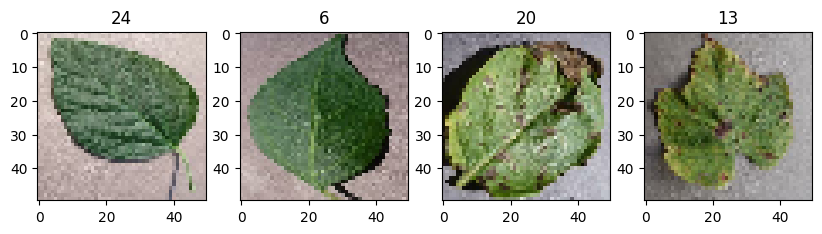

In [6]:
batch = train.as_numpy_iterator().next()
print(batch[0][1].shape)
fig,ax  = plt.subplots(ncols=4,figsize=(10,10))
for indx,img in enumerate(batch[0][:4]):
  ax[indx].imshow(img)
  ax[indx].title.set_text(batch[1][indx])

In [7]:
train = train.shuffle(len(train))

In [8]:
model = Sequential([
      Conv2D(filters=16, kernel_size=(2, 2), activation='relu', input_shape=(50, 50, 3)),
      MaxPooling2D((2, 2)),
      Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(filters=128, kernel_size=(2, 2), activation='relu'),
      MaxPooling2D((2, 2)),
      Dropout(0.5),
      Flatten(),
      Dense(256, activation='relu'),
      Dense(38, activation='softmax')
])

In [9]:
model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name = 'Accuracy'),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(10,name="top-10-Accuracy"),
    ],
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 49, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        4160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0

In [11]:
history = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20



218/218 [==============================] - 67s 170ms/step - loss: 1.7456 - Accuracy: 0.5158 - top-10-Accuracy: 0.8830 - val_loss: 0.9670 - val_Accuracy: 0.7110 - val_top-10-Accuracy: 0.9806
Epoch 2/20
218/218 [==============================] - 60s 166ms/step - loss: 0.8406 - Accuracy: 0.7472 - top-10-Accuracy: 0.9871 - val_loss: 0.6406 - val_Accuracy: 0.8023 - val_top-10-Accuracy: 0.9924
Epoch 3/20
218/218 [==============================] - 59s 164ms/step - loss: 0.6178 - Accuracy: 0.8082 - top-10-Accuracy: 0.9942 - val_loss: 0.5322 - val_Accuracy: 0.8344 - val_top-10-Accuracy: 0.9955
Epoch 4/20
218/218 [==============================] - 62s 176ms/step - loss: 0.4962 - Accuracy: 0.8455 - top-10-Accuracy: 0.9971 - val_loss: 0.3942 - val_Accuracy: 0.8751 - val_top-10-Accuracy: 0.9983
Epoch 5/20
218/218 [==============================] - 61s 168ms/step - loss: 0.4099 - Accuracy: 0.8711 - top-10-Accuracy: 0.9984 - val_loss: 0.3467 - val_Accuracy: 0.8917 - val_top-10-Accuracy: 0.9987
Epoch

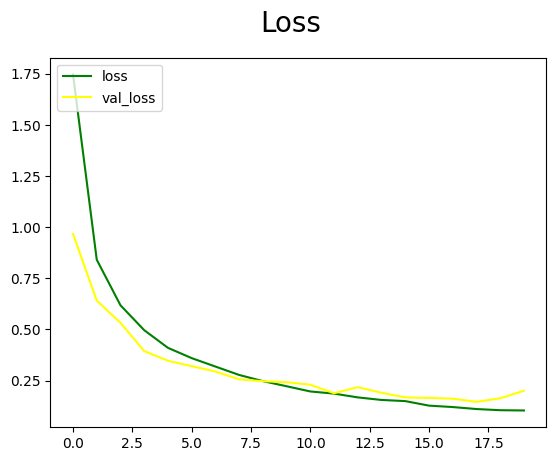

In [12]:
fig = plt.figure()
plt.plot(history.history['loss'],color='green',label='loss')
plt.plot(history.history['val_loss'],color='yellow',label='val_loss')
plt.legend(loc='upper left')
fig.suptitle('Loss',fontsize=20)
plt.show()

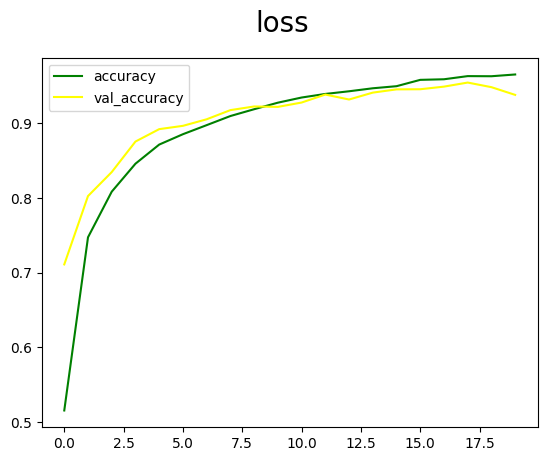

In [13]:
fig = plt.figure()
plt.plot(history.history['Accuracy'],color='green',label='accuracy')
plt.plot(history.history['val_Accuracy'],color='yellow',label='val_accuracy')
plt.legend(loc='upper left')
fig.suptitle('loss',fontsize=20)
plt.show()

In [14]:
test_metrics = model.evaluate(val)

55/55 [==============================] - 5s 75ms/step - loss: 0.2005 - Accuracy: 0.9375 - top-10-Accuracy: 0.9998


In [15]:
test_loss = test_metrics[0]
test_accuracy = test_metrics[1]
test_top_10_Accuracy = test_metrics[2]
print(f"test_loss: {test_loss}  Accuracy: {test_accuracy} top_10_Accuracy:{test_top_10_Accuracy}")

test_loss: 0.20048214495182037  Accuracy: 0.9374827146530151 top_10_Accuracy:0.9998158812522888


In [16]:
from tensorflow.keras.models import load_model

In [17]:
model.save("plantvillageCNN.h5")

c:\Users\KIIT01\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import cv2

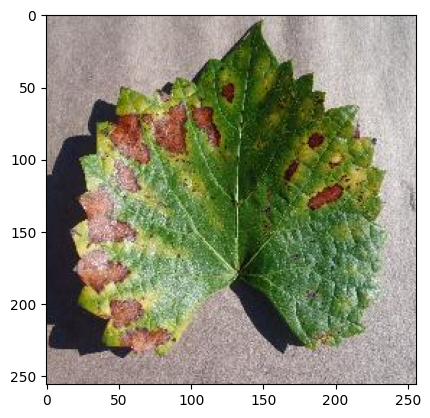

In [36]:
img = cv2.imread(r"C:\Users\KIIT01\PlantVillage\val\Grape___Esca_(Black_Measles)\0b351ad3-5a0c-4a62-b803-9f17fed7d3ea___FAM_B.Msls 1106.JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

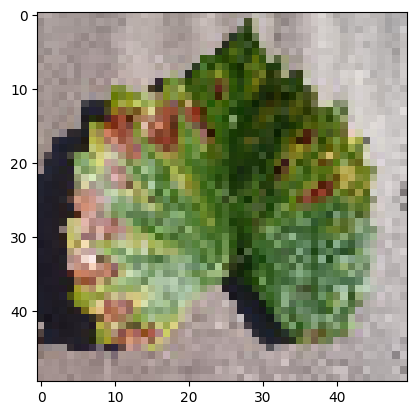

In [37]:
img = tf.image.resize(img, (50,50))
plt.imshow(img.numpy().astype(int))
plt.show()

In [38]:
new_model = load_model('plantvillageCNN.h5')

In [39]:
pred = new_model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 95ms/step


In [40]:
print(pred)

[[3.30413082e-19 3.65478030e-15 7.12429362e-19 1.30130333e-16
  1.02991540e-22 9.85544407e-17 1.95981524e-18 1.06262374e-16
  2.79151609e-15 2.69879792e-21 3.63343929e-24 2.27034957e-06
  9.99992490e-01 5.23509561e-06 2.15314452e-16 8.59017206e-17
  8.66996703e-18 3.04739402e-26 2.84349611e-08 5.17971354e-13
  2.34822775e-15 1.85235196e-13 2.97946700e-21 1.12052276e-17
  5.67850176e-14 2.30169528e-21 9.19322340e-10 1.22985624e-24
  4.98372225e-18 1.44303033e-11 8.99113596e-12 5.56838533e-17
  1.18329261e-11 1.70087902e-19 1.30359322e-17 8.79254081e-13
  1.91077770e-31 2.17819248e-24]]


In [41]:
print("Result: ",class_names[np.argmax(pred)])

Result:  Grape___Esca_(Black_Measles)
